# GRIP TASK 1 - Prediction using Supervised ML
## by Vinay Khanduri

## Importing the basic libraries that'll be required for completing this task

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

###### %matplotlib inline 
It ensures that the plots are produced and stored within this Jupyter notebook.

## Importing the dataset

In [2]:
dataset = pd.read_csv("student_scores.csv")

We have successfully imported the dataset. Now, let's take a look at the first 10 rows of our dataset so that we can know what kind of data we are dealing with right now.

In [3]:
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Performing basic data analysis and visualization

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


###### dataset.info()
It gives us a concise summary of the data that we are currently trying to analyze.

In [5]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

This shows that no data is missing from our dataset so, we don't have to impute our data.

In [6]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


The above table shows us the various statistical terms like mean, standard deviation and the percentiles of the dataset. The percentiles can also be visualized using the boxplots.

### Visualizing data - Box Plots

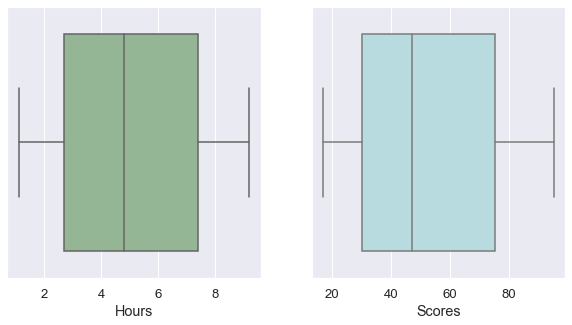

In [7]:
sns.set(rc = {'figure.figsize': (10, 5)}, font_scale = 1.2)
plt.subplot(1, 2, 1)
sns.boxplot( x = dataset['Hours'], color = 'darkseagreen')
plt.subplot(1, 2, 2)
sns.boxplot(x = dataset['Scores'], color = 'powderblue')
plt.show()

### Visualizing data - Histograms

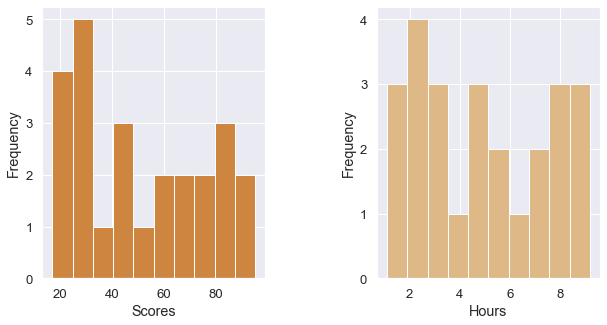

In [8]:
plt.subplots_adjust(wspace = 0.5)
plt.subplot(1, 2, 1)
dataset['Scores'].plot(kind = 'hist', color = 'peru')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
dataset['Hours'].plot(kind = 'hist', color = 'burlywood')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.locator_params(axis = 'y', nbins = 5)
plt.show()

### Visualizing data - Scatter Plot

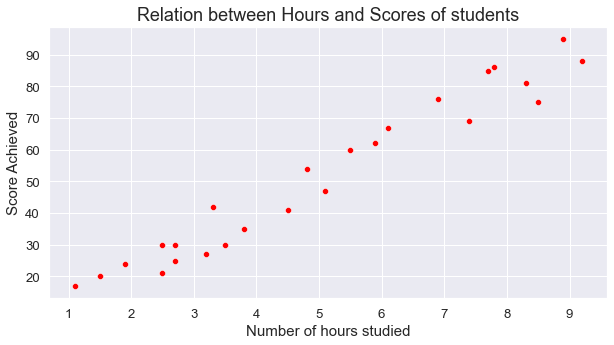

In [9]:
sns.set(rc = {'figure.figsize': (10, 5)}, font_scale = 1.2)
sns.scatterplot(x = 'Hours', y = 'Scores', data = dataset, color = 'red')
plt.title('Relation between Hours and Scores of students', size = 18)
plt.xlabel('Number of hours studied', size = 15)
plt.ylabel('Score Achieved', size = 15)
plt.show()

We can clearly see from the above plot, the scores of the students are increasing linearly with increase in the number of hours they've studied indicating linear relation between the two variables so we'll use simple linear regression to train and predict the scores of students.

### Simple Linear Regression
In simple linear regression, the variable we want to predict is dependant only on one independant variable. In this case, the scores of the student is the what we want to predict and the hours he/she studied for is the independant variable.

Let's plot how the linear regression looks like before we start preparing the data for training the model.

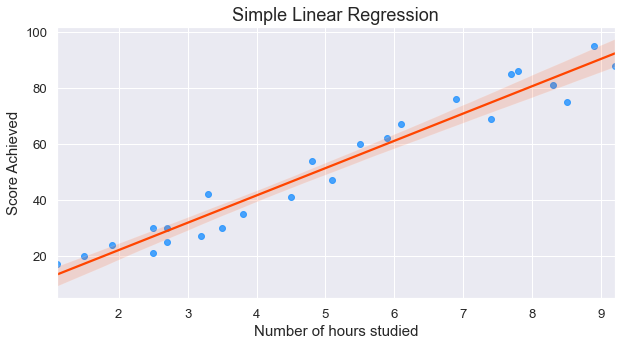

In [10]:
sns.set(rc = {'figure.figsize': (10, 5)}, font_scale = 1.2)
sns.regplot(x = 'Hours', y = 'Scores', data = dataset, scatter_kws = {'color': 'dodgerblue'}, color = 'orangered')
plt.title('Simple Linear Regression', size = 18)
plt.xlabel('Number of hours studied', size = 15)
plt.ylabel('Score Achieved', size = 15)
plt.show()

## Data Preprocessing

First we'll take the independant data (Hours) from the dataset and assign them to the variable X, and the dependant data (Scores) and assign them to the variable y.

In [11]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [12]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [13]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


Now that we have seperated the dependant variable and the independant variable, we can use the simple linear regression algorithm to train them but first let's further divide X and y to two sets. One for training the model and the other for testing the performance of our model.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

###### train_test_split()
It is an inbuilt function of the Sci-Kit Learn library which divides our dataset into two seperate datasets using the 'test_size' parameter which is set to be 0.2 indicating that 20% of the data from X and y will be randomly selected and stored in the X_test and y_test whereas the remaining will be stored in X_train and y_train. 
The 'random_state = 0' makes sure that the randomly selected data is always the same everytime this piece of code is run.

In [15]:
print("Training Set: ")
print("X:\n", X_train)
print("y:\n", y_train)

Training Set: 
X:
 [[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
y:
 [35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]


In [16]:
print("Test Set: ")
print("X:\n", X_test)
print("y:\n", y_test)

Test Set: 
X:
 [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
y:
 [20 27 69 30 62]


## Training the Linear Regression Model

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the test set scores using our model

In [18]:
y_pred = regressor.predict(X_test)

Comparing the values of the predicted y, by using the linear regression algorithm, for the test results and the actual y for the test results.

In [19]:
test_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
test_compare

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Now let's plot and compare both of them visually!

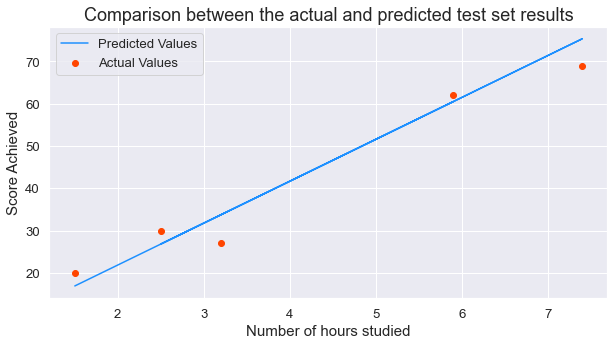

In [20]:
plt.scatter(X_test, y_test, color = 'orangered', label = 'Actual Values')
plt.plot(X_test, y_pred, color = 'dodgerblue', label = 'Predicted Values')
plt.title('Comparison between the actual and predicted test set results', size = 18)
plt.xlabel('Number of hours studied', size = 15)
plt.ylabel('Score Achieved', size = 15)
plt.legend()
plt.show()

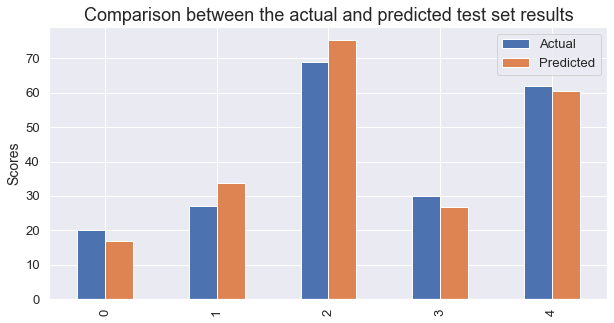

In [21]:
test_compare.plot(kind = 'bar')
plt.ylabel('Scores', size = 14)
plt.title('Comparison between the actual and predicted test set results', size = 18)
plt.show()

### Predicting the score for a student who studied for 9.25 hours

In [22]:
print(regressor.predict([[9.25]]))

[93.69173249]


The model has successfully predicted the score of a student who studies for 9.25 hours to be 93.69173249

## Evaluating the performance of the model

In [23]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

21.5987693072174

In [24]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

4.183859899002975

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9454906892105356

For a perfect model, the value of $MSE = 0$, $MAE = 0$ and $R^2 = 100%$

For this model, we have $R^2 \approx 94.55%$, which is brilliant but we have a high value for the $MSE$, the reason for which can be the small dataset used for training the model.